In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import linear_model
from sqlalchemy import create_engine

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house_df = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()

house_df.head()

,id,mssubclass,mszoning,lotfrontage,lotarea,street,alley,lotshape,landcontour,utilities,...,poolarea,poolqc,fence,miscfeature,miscval,mosold,yrsold,saletype,salecondition,saleprice
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,...,0,None,None,None,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,...,0,None,None,None,0,12,2008,WD,Normal,250000


In [3]:
house_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
mszoning         1460 non-null object
lotfrontage      1201 non-null float64
lotarea          1460 non-null int64
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-n

As we can see therer are two types of data, numbers(float or int) and strings(ojects). 
We can work seprately on each group to do the data cleaning.

In [4]:
non_numeric = house_df.select_dtypes('object').columns
print('The numner of non numeric columns is {}'.format(len(non_numeric)))
house_df[non_numeric].info()

The numner of non numeric columns is 43
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 43 columns):
mszoning         1460 non-null object
street           1460 non-null object
alley            91 non-null object
lotshape         1460 non-null object
landcontour      1460 non-null object
utilities        1460 non-null object
lotconfig        1460 non-null object
landslope        1460 non-null object
neighborhood     1460 non-null object
condition1       1460 non-null object
condition2       1460 non-null object
bldgtype         1460 non-null object
housestyle       1460 non-null object
roofstyle        1460 non-null object
roofmatl         1460 non-null object
exterior1st      1460 non-null object
exterior2nd      1460 non-null object
masvnrtype       1452 non-null object
exterqual        1460 non-null object
extercond        1460 non-null object
foundation       1460 non-null object
bsmtqual         1423 non-null object
bsmtcond         14

In [5]:
numeric = house_df.select_dtypes(['int64', 'float64']).columns
print('The numner of numeric columns is {}'.format(len(numeric)))

for i in numeric:
    house_df[i] = house_df[i].fillna(house_df[i].mean())
    
house_df[numeric].info()

The numner of numeric columns is 38
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 38 columns):
id               1460 non-null int64
mssubclass       1460 non-null int64
lotfrontage      1460 non-null float64
lotarea          1460 non-null int64
overallqual      1460 non-null int64
overallcond      1460 non-null int64
yearbuilt        1460 non-null int64
yearremodadd     1460 non-null int64
masvnrarea       1460 non-null float64
bsmtfinsf1       1460 non-null int64
bsmtfinsf2       1460 non-null int64
bsmtunfsf        1460 non-null int64
totalbsmtsf      1460 non-null int64
firstflrsf       1460 non-null int64
secondflrsf      1460 non-null int64
lowqualfinsf     1460 non-null int64
grlivarea        1460 non-null int64
bsmtfullbath     1460 non-null int64
bsmthalfbath     1460 non-null int64
fullbath         1460 non-null int64
halfbath         1460 non-null int64
bedroomabvgr     1460 non-null int64
kitchenabvgr     1460 non-null int64
to

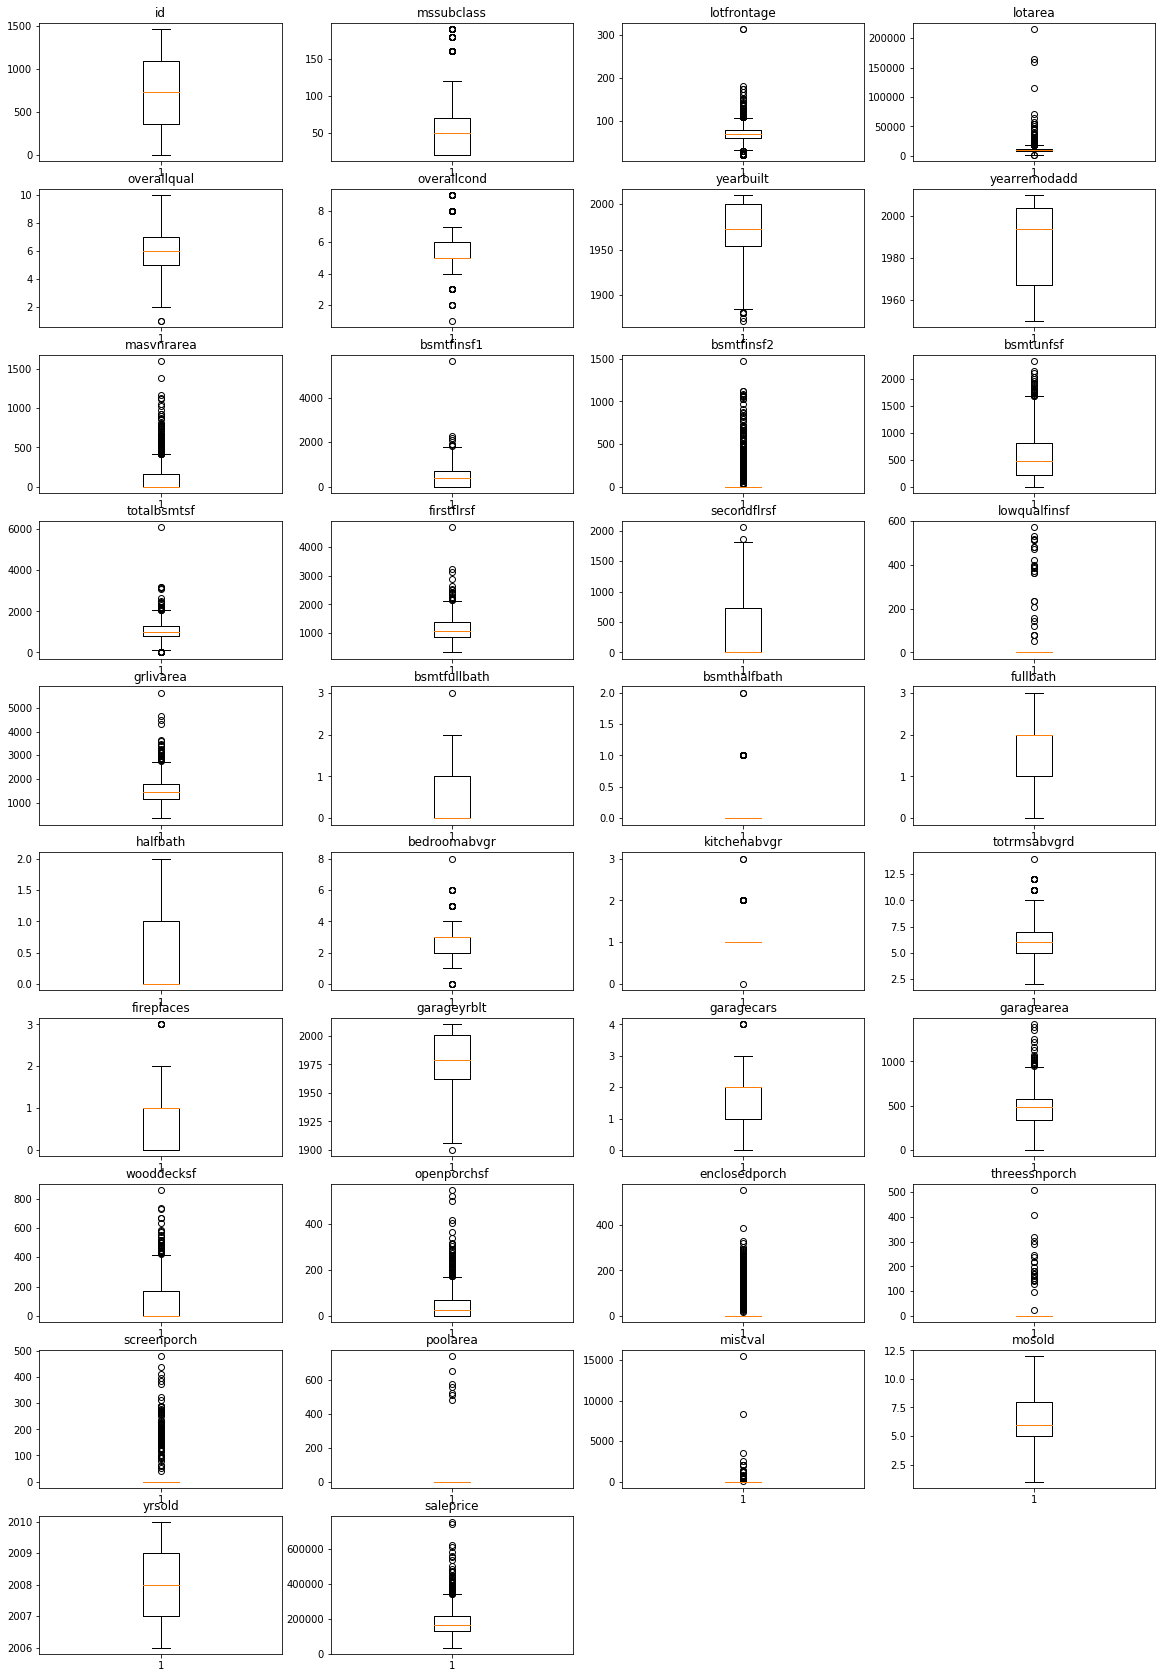

In [6]:
plt.figure(figsize=(20,30))
columns = house_df.select_dtypes(['int64', 'float64']).columns
for index, value in enumerate(columns):
                     plt.subplot(10,4,index+1)
                     plt.boxplot(house_df[value],whis=1.5)
                     plt.title(value)

plt.show()

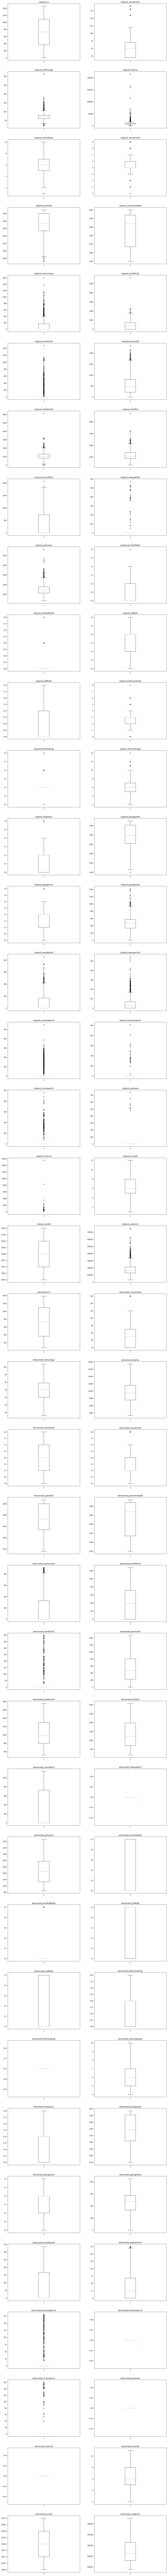

In [7]:
# Winsorize Adult_Mortality
from scipy.stats.mstats import winsorize
plt.figure(figsize=(18,300))

for index, value in enumerate(columns):
    
    plt.subplot(38,2,index+1)
    original = house_df[value]
    plt.boxplot(original)
    plt.title("original_" + value)

    plt.subplot(38,2,index+39)
    winsorized = winsorize(house_df[value],(.05,0.05))
    plt.boxplot(winsorized)
    plt.title("winsorized_" + value)

plt.show()

In [8]:
# Winsorize 
for value in (columns):
    house_df['winsorized_' + value] = winsorize(house_df[value],(.05,0.05))


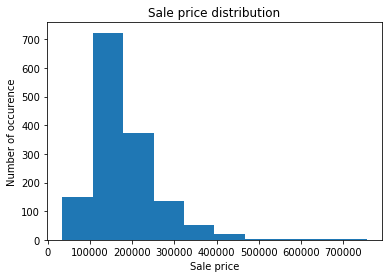

In [9]:
plt.hist(house_df['saleprice'])
plt.title('Sale price distribution')
plt.xlabel('Sale price')
plt.ylabel('Number of occurence')
plt.show()

In [10]:
np.abs(house_df[numeric].iloc[:,1:].corr().loc[:,'saleprice']).sort_values(ascending=False)

saleprice        1.000000
overallqual      0.790982
grlivarea        0.708624
garagecars       0.640409
garagearea       0.623431
totalbsmtsf      0.613581
firstflrsf       0.605852
fullbath         0.560664
totrmsabvgrd     0.533723
yearbuilt        0.522897
yearremodadd     0.507101
masvnrarea       0.475241
garageyrblt      0.470177
fireplaces       0.466929
bsmtfinsf1       0.386420
lotfrontage      0.334901
wooddecksf       0.324413
secondflrsf      0.319334
openporchsf      0.315856
halfbath         0.284108
lotarea          0.263843
bsmtfullbath     0.227122
bsmtunfsf        0.214479
bedroomabvgr     0.168213
kitchenabvgr     0.135907
enclosedporch    0.128578
screenporch      0.111447
poolarea         0.092404
mssubclass       0.084284
overallcond      0.077856
mosold           0.046432
threessnporch    0.044584
yrsold           0.028923
lowqualfinsf     0.025606
miscval          0.021190
bsmthalfbath     0.016844
bsmtfinsf2       0.011378
Name: saleprice, dtype: float64

#### We can use the first five features that over .6 as our numeric components of regression model.

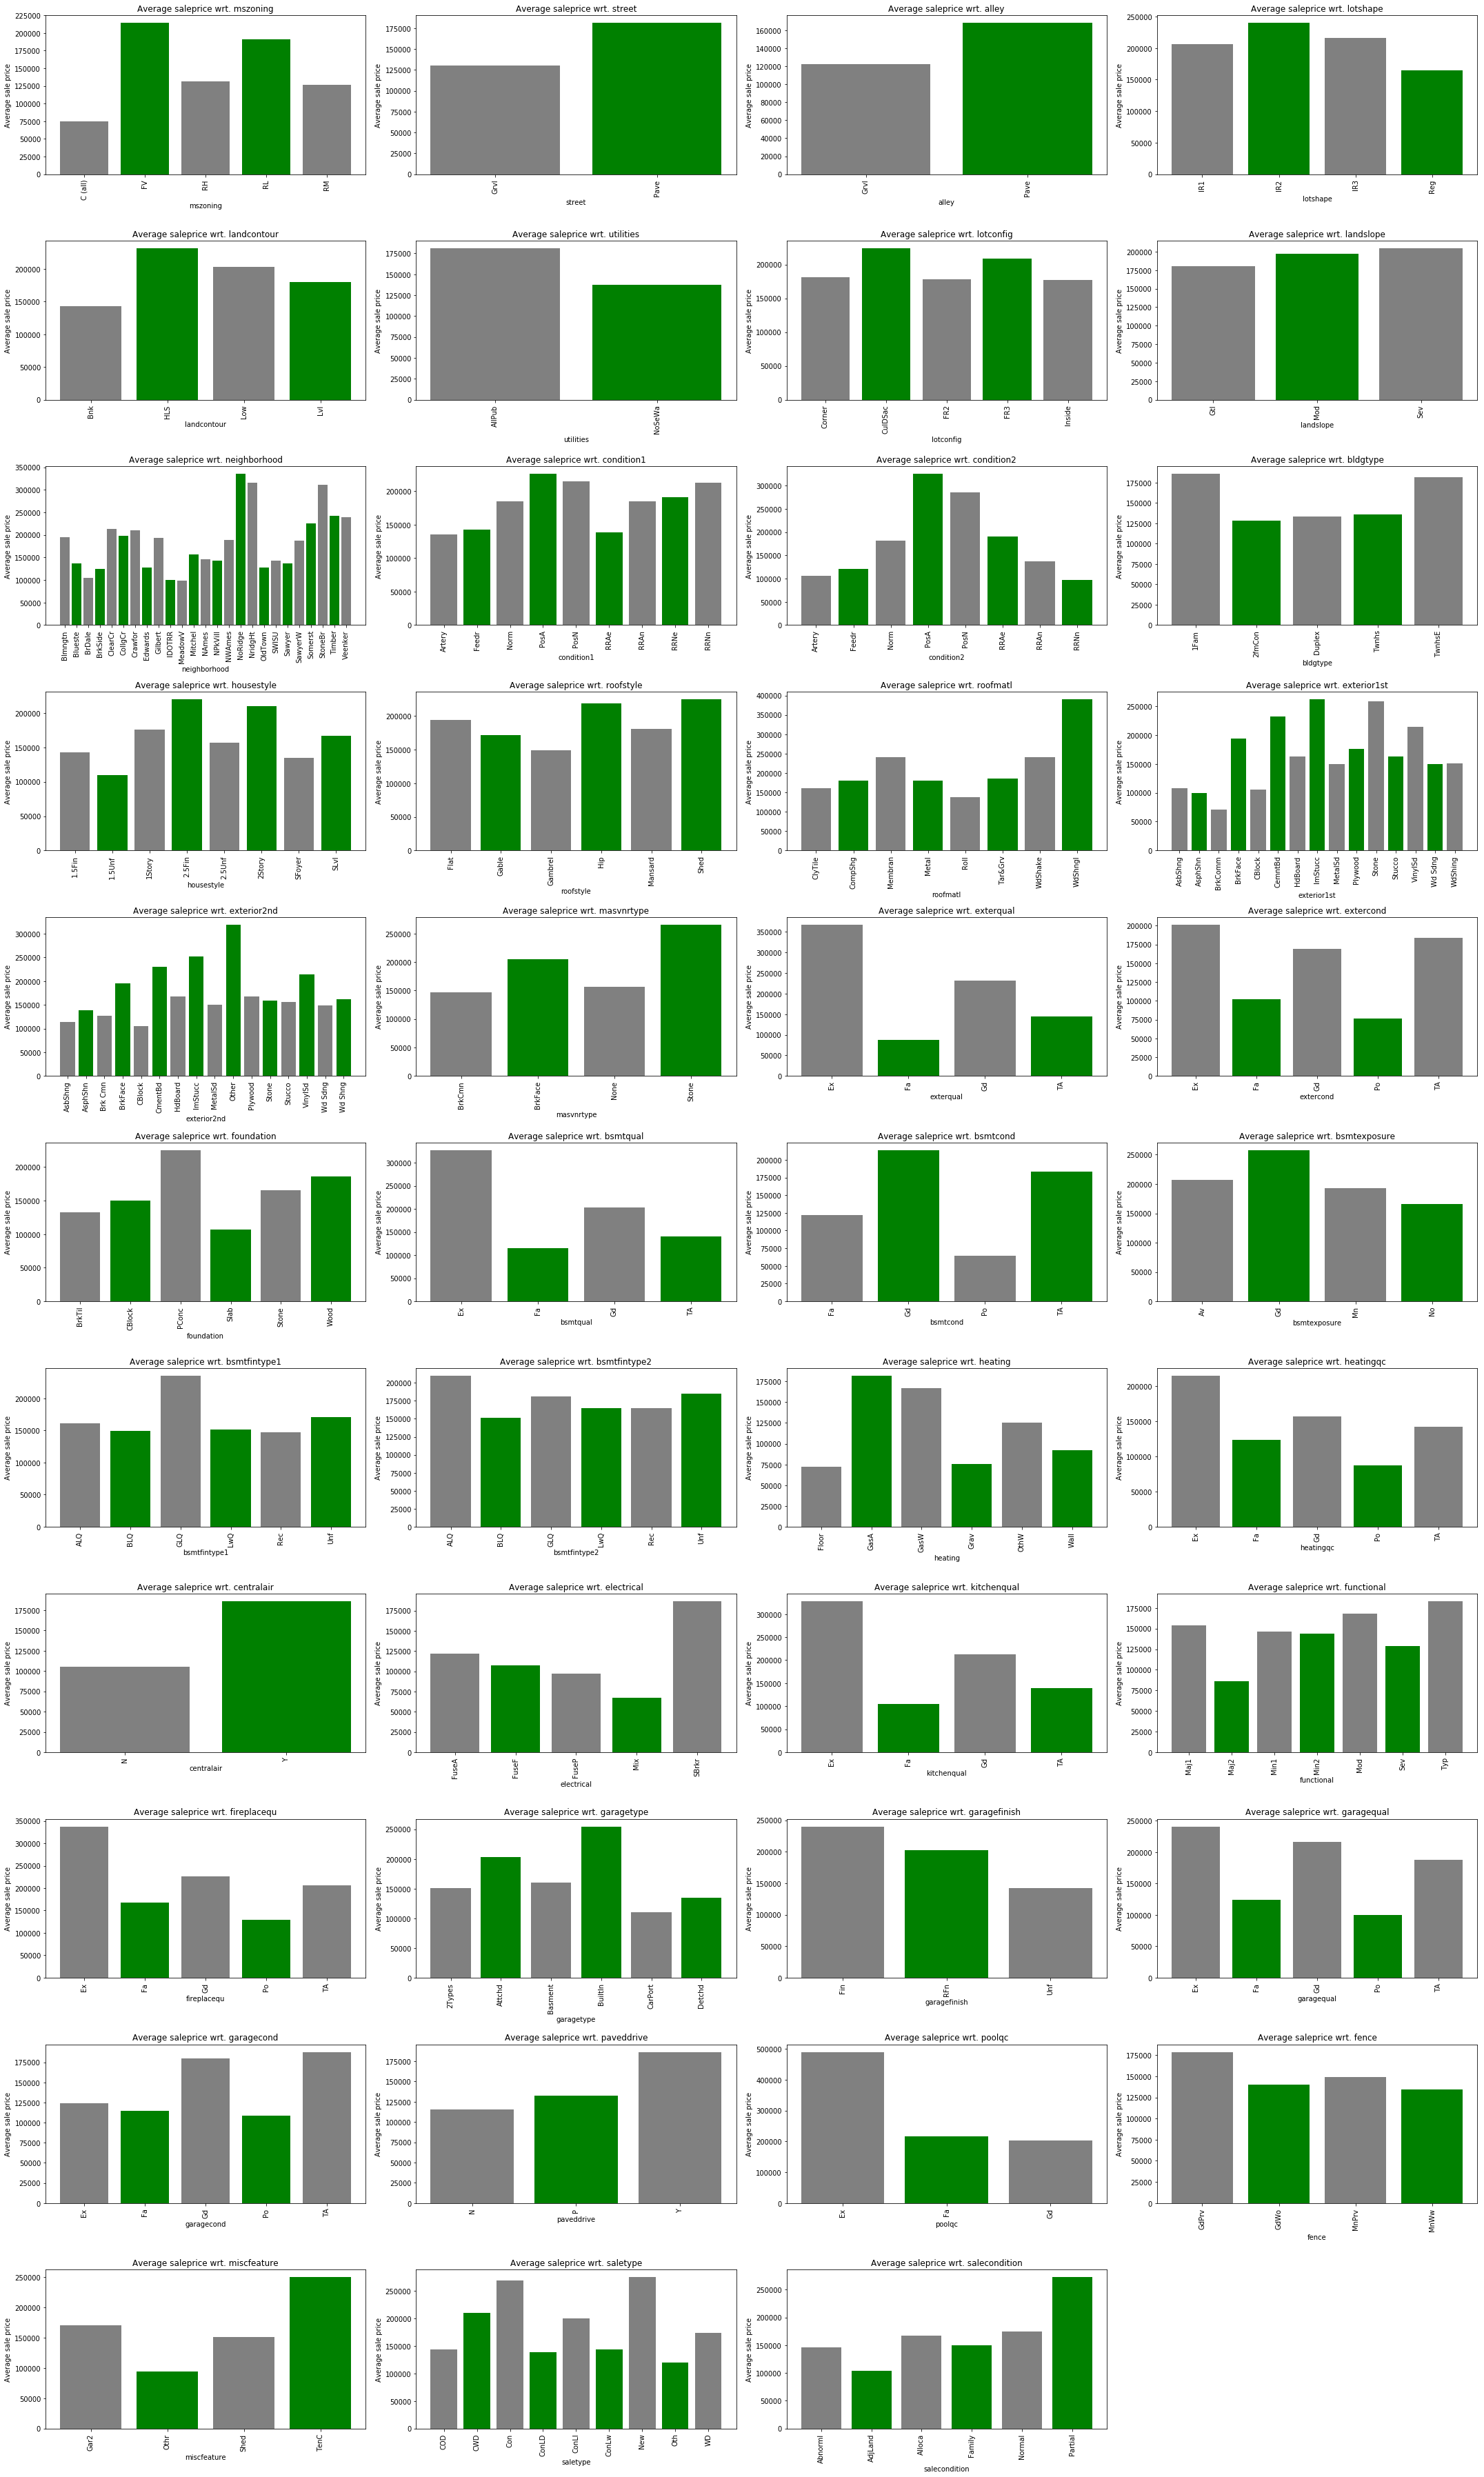

In [11]:
plt.figure(figsize=(30,50))

for index, column in enumerate(non_numeric):
    plt.subplot(11,4,index+1)
    plt.bar(house_df.groupby(column)["saleprice"].mean().index, house_df.groupby(column)["saleprice"].mean(),
           color=("grey","green"))
    plt.title("Average saleprice wrt. {}".format(column))
    plt.ylabel("Average sale price")
    plt.xlabel(column)
    plt.xticks(rotation='vertical')

plt.tight_layout()
plt.show()

#### For non numeric features , using the feature that has the most effect which is the graph number 9 and 17.

In [12]:
non_numeric[42]

'salecondition'

<BarContainer object of 6 artists>

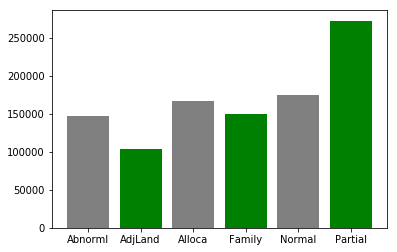

In [13]:
plt.bar(house_df.groupby('salecondition')["saleprice"].mean().index, house_df.groupby('salecondition')["saleprice"].mean(),
           color=("grey","green"))

In [14]:
non_numeric[1]

'street'

<BarContainer object of 2 artists>

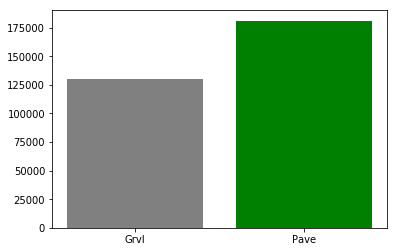

In [15]:
plt.bar(house_df.groupby('street')["saleprice"].mean().index, house_df.groupby('street')["saleprice"].mean(),
           color=("grey","green"))

In [16]:
# Now we concerrt our non numeric data to numeric values

house_df = pd.concat([house_df,pd.get_dummies(house_df.salecondition, prefix="salecondition", drop_first=True)], axis=1)
house_df = pd.concat([house_df,pd.get_dummies(house_df.street, prefix="street", drop_first=True)], axis=1)

dummy_columns = list(pd.get_dummies(house_df.salecondition, prefix="salecondition", drop_first=True).columns)
dummy_columns = dummy_columns + list(pd.get_dummies(house_df.street, prefix="street", drop_first=True).columns)


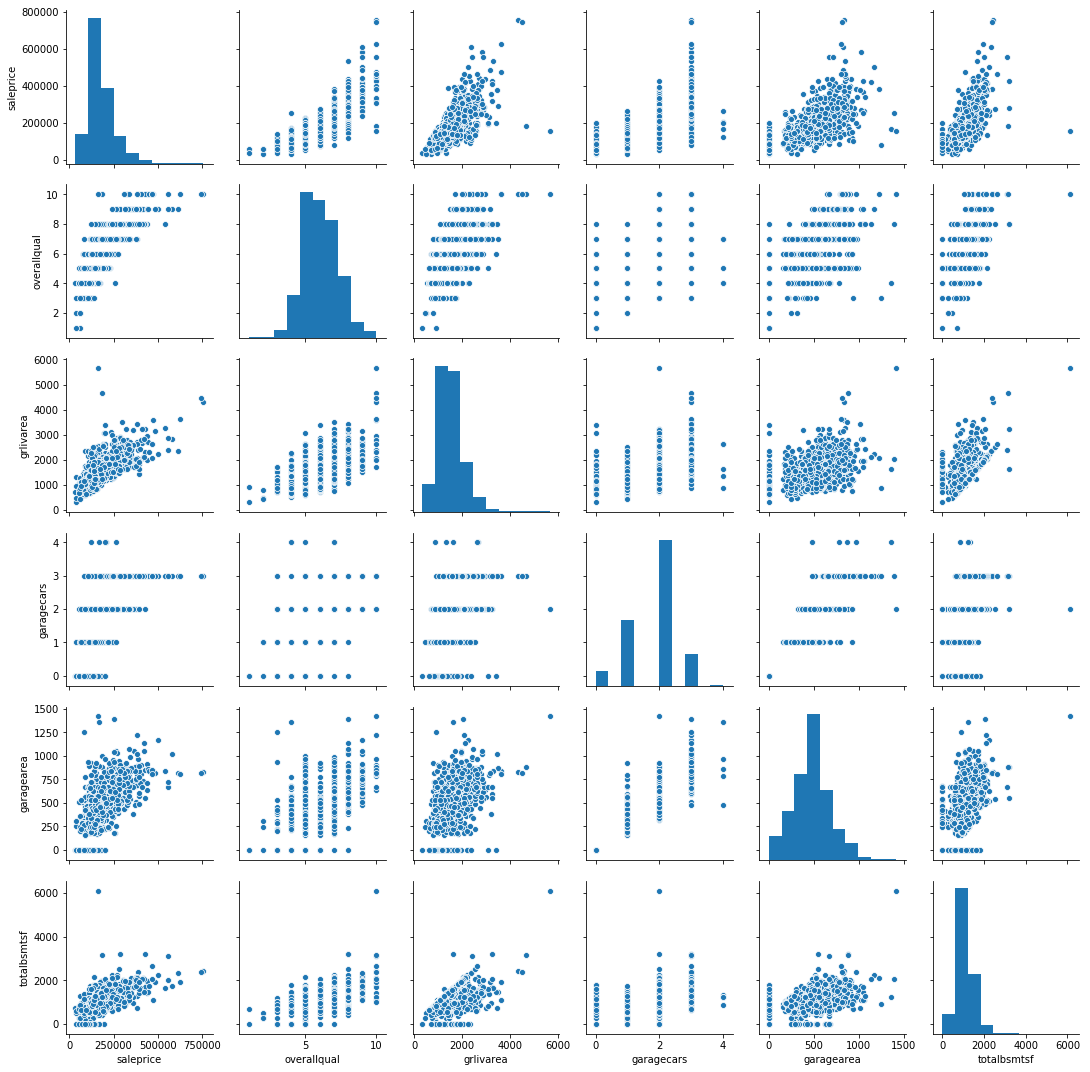

In [17]:
columns = ['saleprice', 'overallqual', 'grlivarea', 'garagecars','garagearea', 'totalbsmtsf']
sns.pairplot(house_df[columns])

### Regression Modeling

#### Linear regression

In [18]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Creating the model

X = house_df[['overallqual', 'grlivarea', 'garagecars','garagearea', 'totalbsmtsf'] + dummy_columns]
Y = house_df['saleprice']

# Standardizing data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
house_df[numeric] = scaler.fit_transform(house_df[numeric])


X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 465)

print("The number of observations in training set is {}".format(X_train.shape[0]))
print("The number of observations in test set is {}".format(X_test.shape[0]))


The number of observations in training set is 1168
The number of observations in test set is 292


In [19]:
# We fit an OLS model using sklearn
lrm = LinearRegression()
lrm.fit(X_train, y_train)


# We are making predictions here
y_preds_train = lrm.predict(X_train)
y_preds_test = lrm.predict(X_test)

# Inspect the results.
print('\nCoefficients: \n', lrm.coef_)
print('\nIntercept: \n', lrm.intercept_)


Coefficients: 
 [ 2.32190085e+04  4.41599032e+01  1.54136394e+04  1.29048424e+01
  2.65736875e+01  3.24862023e+04  1.50524781e+04 -9.47844138e+03
  1.28072237e+04  3.17723497e+04 -2.49083699e+03]

Intercept: 
 -100255.92769194453


R-squared of the model in the training set is: 0.7660902835273545
-----Test set statistics-----
R-squared of the model in the test set is: 0.7769126490981597
Mean absolute error of the prediction is: 25380.71897839425
Mean squared error of the prediction is: 1497742457.7393682
Root mean squared error of the prediction is: 38700.677742636086
Mean absolute percentage error of the prediction is: 15.615865907880448


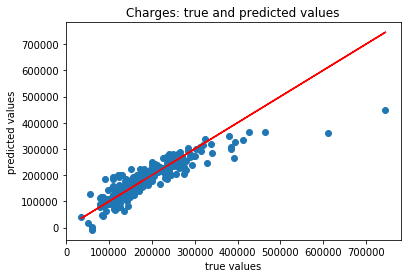

In [20]:
from sklearn.metrics import mean_absolute_error
from statsmodels.tools.eval_measures import mse, rmse

print("R-squared of the model in the training set is: {}".format(lrm.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model in the test set is: {}".format(lrm.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(lrm, X_train, y_train, cv=10)

array([0.58572091, 0.82630831, 0.82857305, 0.85748718, 0.8178094 ,
       0.80365199, 0.43717993, 0.7793904 , 0.79927252, 0.8179364 ])

In [22]:
cross_val_score(lrm, X_test, y_test, cv=10)

array([0.71760053, 0.85548536, 0.81337932, 0.73189617, 0.74285665,
       0.54106764, 0.83918367, 0.76422033, 0.79392525, 0.87970732])

#### Ridge regression

R-squared of the model on the training set is: 0.7342982489720777
-----Test set statistics-----
R-squared of the model on the test set is: 0.7633219293244471
Mean absolute error of the prediction is: 24686.63319762721
Mean squared error of the prediction is: 1588986528.5216863
Root mean squared error of the prediction is: 39862.093880297936
Mean absolute percentage error of the prediction is: 14.758060203217527


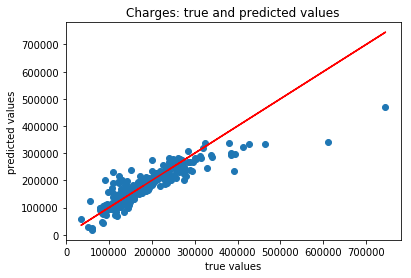

In [23]:
from sklearn.linear_model import Ridge

# Fitting a ridge regression model. Alpha is the regularization
# parameter (usually called lambda). As alpha gets larger, parameter
# shrinkage grows more pronounced.
ridgeregr = Ridge(alpha=10**3) 
ridgeregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = ridgeregr.predict(X_train)
y_preds_test = ridgeregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(ridgeregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(ridgeregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [24]:
from sklearn.model_selection import cross_val_score

cross_val_score(ridgeregr, X_train, y_train, cv=10)

array([0.55424734, 0.81426852, 0.82907277, 0.81588595, 0.79349877,
       0.80768302, 0.30403757, 0.77620821, 0.76294233, 0.79315113])

In [25]:
cross_val_score(ridgeregr, X_test, y_test, cv=10)

array([0.73627352, 0.78176774, 0.77457097, 0.62912633, 0.62785455,
       0.4574335 , 0.83922208, 0.78391297, 0.71695841, 0.81182913])

#### Lasso regression

R-squared of the model on the training set is: 0.7654361579007325
-----Test set statistics-----
R-squared of the model on the test set is: 0.7779424380895749
Mean absolute error of the prediction is: 25198.557488751998
Mean squared error of the prediction is: 1490828759.1871195
Root mean squared error of the prediction is: 38611.2517174349
Mean absolute percentage error of the prediction is: 15.427990620118232


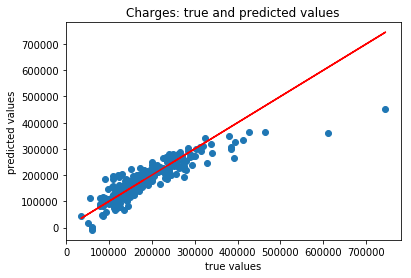

In [26]:
from sklearn.linear_model import Lasso

lassoregr = Lasso(alpha=10**2) 
lassoregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = lassoregr.predict(X_train)
y_preds_test = lassoregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(lassoregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(lassoregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [27]:
from sklearn.model_selection import cross_val_score

cross_val_score(lassoregr, X_train, y_train, cv=10)

array([0.5874134 , 0.82834083, 0.82953194, 0.857331  , 0.82009333,
       0.80571179, 0.4356537 , 0.77967417, 0.80175308, 0.82082378])

In [28]:
cross_val_score(lassoregr, X_test, y_test, cv=10)

array([0.72386062, 0.86055603, 0.8186151 , 0.74213072, 0.74630375,
       0.54336016, 0.84569099, 0.76348447, 0.79268721, 0.87820964])

#### ElasticNet regression

R-squared of the model on the training set is: 0.6817208351851511
-----Test set statistics-----
R-squared of the model on the test set is: 0.7277283150524431
Mean absolute error of the prediction is: 26059.100775806357
Mean squared error of the prediction is: 1827951521.8486066
Root mean squared error of the prediction is: 42754.54972103678
Mean absolute percentage error of the prediction is: 15.136962288820033


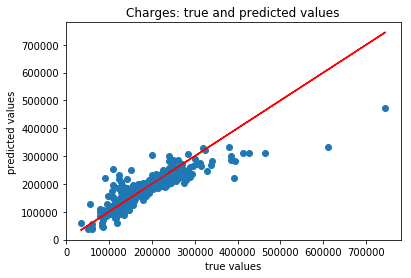

In [29]:
from sklearn.linear_model import ElasticNet

elasticregr = ElasticNet(alpha=10**1, l1_ratio=0.5) 
elasticregr.fit(X_train, y_train)

# We are making predictions here
y_preds_train = elasticregr.predict(X_train)
y_preds_test = elasticregr.predict(X_test)

print("R-squared of the model on the training set is: {}".format(elasticregr.score(X_train, y_train)))
print("-----Test set statistics-----")
print("R-squared of the model on the test set is: {}".format(elasticregr.score(X_test, y_test)))
print("Mean absolute error of the prediction is: {}".format(mean_absolute_error(y_test, y_preds_test)))
print("Mean squared error of the prediction is: {}".format(mse(y_test, y_preds_test)))
print("Root mean squared error of the prediction is: {}".format(rmse(y_test, y_preds_test)))
print("Mean absolute percentage error of the prediction is: {}".format(np.mean(np.abs((y_test - y_preds_test) / y_test)) * 100))

plt.scatter(y_test, y_preds_test)
plt.plot(y_test, y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("Charges: true and predicted values")
plt.show()

In [30]:
from sklearn.model_selection import cross_val_score

cross_val_score(elasticregr, X_train, y_train, cv=10)

array([0.50532465, 0.77943069, 0.80183145, 0.75096344, 0.75231057,
       0.78199214, 0.19099844, 0.74218754, 0.68698442, 0.74447933])

In [31]:
cross_val_score(elasticregr, X_test, y_test, cv=10)

array([0.73550914, 0.7769731 , 0.77098631, 0.62004189, 0.61998866,
       0.45221917, 0.83681564, 0.77938279, 0.71229122, 0.80592353])

By Comparing the above results, linear regression and Lasso regression are almost have same result. But wan conclude the linear regression has slightly better performance.

All the data included in this data set are basically related to geographic or physical aspects of house prices. However, there are many other features that will effect the sale price. For example, these days the coronavirus not only effects all of our lives, but also has an impact on house price. We can see the house price are decreasing slightly. Global warming, political events also can effect the sale prices.